<a href="https://colab.research.google.com/github/Prava0712/Airbnb-Price-Prediction-and-Insights/blob/main/Airbnb_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration and Preprocessing:- Analyze the dataset for trends, missing values, and
outliers. Perform data cleaning, feature engineering, and transformations.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# Load Dataset
df = pd.read_csv("Airbnbdata.csv", on_bad_lines='skip', engine='python')
# Quick Overview
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (26566, 29)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26566 entries, 0 to 26565
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      26566 non-null  int64  
 1   log_price               26566 non-null  float64
 2   property_type           26566 non-null  object 
 3   room_type               26566 non-null  object 
 4   amenities               26566 non-null  object 
 5   accommodates            26566 non-null  int64  
 6   bathrooms               26485 non-null  float64
 7   bed_type                26566 non-null  object 
 8   cancellation_policy     26566 non-null  object 
 9   cleaning_fee            26566 non-null  bool   
 10  city                    26566 non-null  object 
 11  description             26566 non-null  object 
 12  first_review            20840 non-null  object 
 13  host_has_profile_pic    26489 non-null  object 
 

# Analyze Trends
# Price Distribution

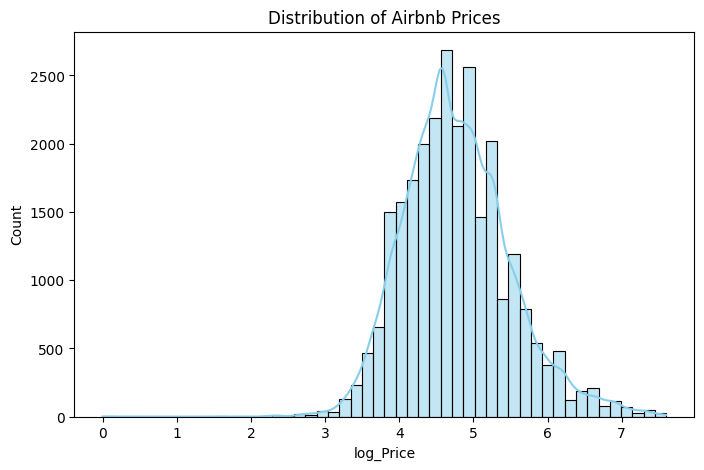

/tmp/ipython-input-2835216368.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='room_type', y='log_price', data=df,


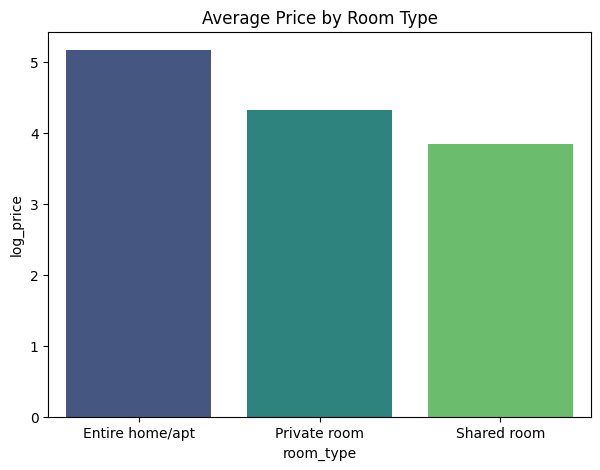

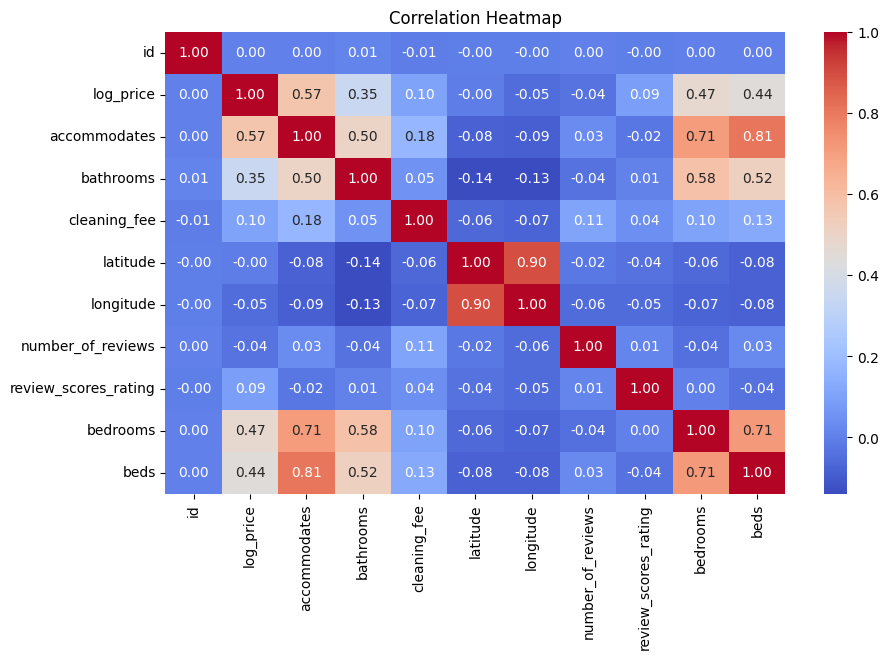

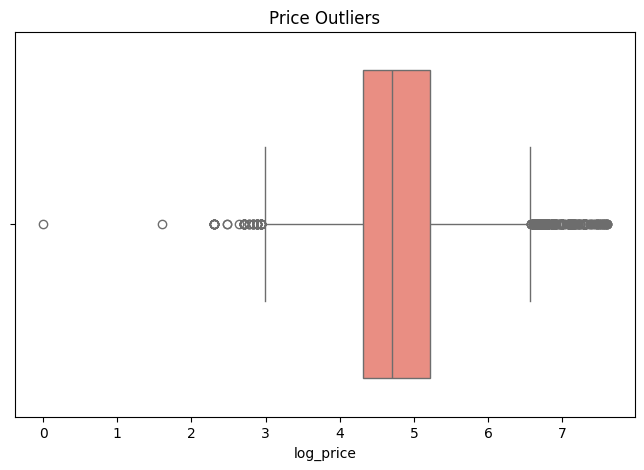

Outlier Threshold: 2.96 to 6.57


In [5]:

plt.figure(figsize=(8,5))
sns.histplot(df['log_price'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Airbnb Prices")
plt.xlabel("log_Price")
plt.ylabel("Count")
plt.show()
# Average Price by Room Type
if 'room_type' in df.columns:
 plt.figure(figsize=(7,5))
 sns.barplot(x='room_type', y='log_price', data=df,
estimator='mean', errorbar=None, palette='viridis')
 plt.title("Average Price by Room Type")
 plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',
fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# Check for Outliers
plt.figure(figsize=(8,5))
sns.boxplot(x=df['log_price'], color='salmon')
plt.title("Price Outliers")
plt.show()
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
print(f"Outlier Threshold: {lower:.2f} to {upper:.2f}")

In [7]:
# Handle Missing Values
df['review_scores_rating'] = df['review_scores_rating'].fillna(0)
df = df.dropna(subset=['log_price'])
# Remove Outliers
df = df[(df['log_price'] >= lower) & (df['log_price'] <= upper)]
print("Data shape after removing outliers:", df.shape)


Data shape after removing outliers: (26003, 29)


In [10]:
 # Feature Engineering
if 'amenities' in df.columns:
    df['num_amenities'] = df['amenities'].apply(lambda x:
    len(str(x).split(',')))
# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))
 # Feature Transformation

scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("✅ Data Preprocessing Complete")

✅ Data Preprocessing Complete


Model Development:- Build a regression model to predict listing prices.

In [14]:
# Split Data into Train, Validation, and Test Sets
X = df.drop('log_price', axis=1)
y = df['log_price']
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
test_size=0.5, random_state=42)
print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")
# Impute missing values using the mean of the training set
for col in X_train.columns:
    if X_train[col].isnull().any():
        mean_val = X_train[col].mean()
        X_train[col] = X_train[col].fillna(mean_val)
        X_val[col] = X_val[col].fillna(mean_val)
        X_test[col] = X_test[col].fillna(mean_val)

# Train Multiple Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
print("✅ Model Training Completed")

Train: (18202, 29), Validation: (3900, 29), Test: (3901, 29)
✅ Model Training Completed


Model Evaluation Evaluate the model’s performance using appropriate metrics like RMSE, MAE and R².


📊 Model Evaluation Results:

Linear Regression:
RMSE: 0.693
MAE: 0.535
R²: 0.512

Random Forest:
RMSE: 0.587
MAE: 0.443
R²: 0.651

XGBoost:
RMSE: 0.581
MAE: 0.438
R²: 0.657


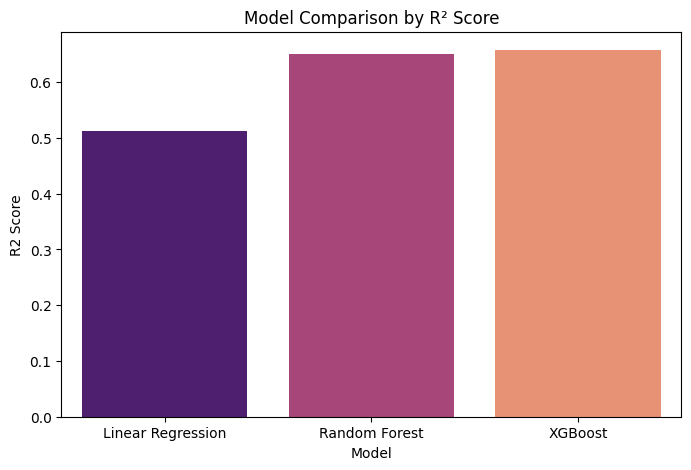

In [17]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)
def evaluate_model(model, X, y):
 preds = model.predict(X)
 rmse = np.sqrt(mean_squared_error(y, preds))
 mae = mean_absolute_error(y, preds)
 r2 = r2_score(y, preds)
 return rmse, mae, r2
models = {'Linear Regression': lr, 'Random Forest': rf, 'XGBoost':
xgb}
print("\n📊 Model Evaluation Results:")
for name, model in models.items():
 rmse, mae, r2 = evaluate_model(model, X_test, y_test)
 print(f"\n{name}:")
 print(f"RMSE: {rmse:.3f}")
 print(f"MAE: {mae:.3f}")
 print(f"R²: {r2:.3f}")
# Visual comparison
results = pd.DataFrame({
 'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
 'RMSE': [evaluate_model(lr, X_test, y_test)[0],
 evaluate_model(rf, X_test, y_test)[0],
 evaluate_model(xgb, X_test, y_test)[0]],
 'R2 Score': [evaluate_model(lr, X_test, y_test)[2],
 evaluate_model(rf, X_test, y_test)[2],
 evaluate_model(xgb, X_test, y_test)[2]]
})
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2 Score', data=results, palette='magma', hue='Model', legend=False)
plt.title("Model Comparison by R² Score")
plt.show()